# Exploratory Data Analysis: Stanford Sentiment Treebank (SST-5) Dataset

The Stanford Sentiment Treebank (SST-5, or SST-fine-grained) dataset is a suitable benchmark to test our application, since it was designed to help evaluate a model’s ability to understand representations of sentence structure, rather than just looking at individual words in isolation. SST-5 consists of 11,855 sentences extracted from movie reviews with fine-grained sentiment labels [1–5], as well as 215,154 phrases that compose each sentence in the dataset.

<img src="https://miro.medium.com/max/700/1*ug8kyqUlnqEuo3LhHfNypg.png"> 

Since we are not using a recursive tree-based classifier like the Stanford paper, I prepared the data in complete samples(ignoring the component phrases). The tree structure of phrases is converted to raw text and its associated class label using the pytreebank library.

In [1]:
import pytreebank
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [2]:
# Load data using pytreebank library
data_root = './data/sst/'
out_path = os.path.join(data_root, 'sst_{}.txt')
dataset = pytreebank.load_sst(os.path.join(data_root, 'raw_data'))

# Store train, dev and test in separate files
for category in ['train', 'test', 'dev']:
    with open(out_path.format(category), 'w') as outfile:
        for item in dataset[category]:
            outfile.write("__label__{}\t{}\n".format(
                item.to_labeled_lines()[0][0] + 1, item.to_labeled_lines()[0][1]
            ))

# Print the length of the training set
print("Train data length: ", len(dataset['train']))
print("Test data length: ", len(dataset['test']))
print("Dev data length: ", len(dataset['dev']))

Train data length:  8544
Test data length:  2210
Dev data length:  1101


In [3]:
# Read train data
df_train = pd.read_csv(
    os.path.join(data_root, 'sst_train.txt'), sep='\t', header=None, names=['truth', 'text']
)
df_train['truth'] = df_train['truth'].str.replace('__label__', '')
df_train['truth'] = df_train['truth'].astype(int).astype('category')
df_train

,truth,text
0,4,The Rock is destined to be the 21st Century 's...
1,5,The gorgeously elaborate continuation of `` Th...
2,4,Singer/composer Bryan Adams contributes a slew...
3,3,You 'd think by now America would have had eno...
4,4,Yet the act is still charming here .
...,...,...
8539,1,A real snooze .
8540,2,No surprises .
8541,4,We 've seen the hippie-turned-yuppie plot befo...
8542,1,Her fans walked out muttering words like `` ho...


Text(0, 0.5, 'Label')

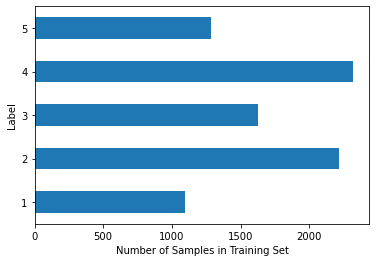

In [4]:
ax = df_train['truth'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in Training Set")
ax.set_ylabel("Label")

In [5]:
# Read test data
df_test = pd.read_csv(
    os.path.join(data_root, 'sst_test.txt'), sep='\t', header=None, names=['truth', 'text']
)
df_test['truth'] = df_test['truth'].str.replace('__label__', '')
df_test['truth'] = df_test['truth'].astype(int).astype('category')
df_test

,truth,text
0,3,Effective but too-tepid biopic
1,4,If you sometimes like to go to the movies to h...
2,5,"Emerges as something rare , an issue movie tha..."
3,3,The film provides some great insight into the ...
4,5,Offers that rare combination of entertainment ...
...,...,...
2205,4,An imaginative comedy/thriller .
2206,5,"( A ) rare , beautiful film ."
2207,5,( An ) hilarious romantic comedy .
2208,4,Never ( sinks ) into exploitation .


Text(0, 0.5, 'Label')

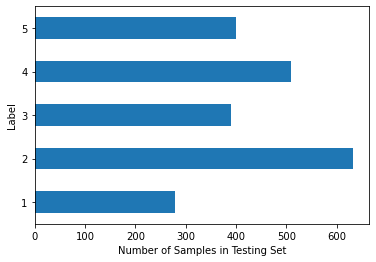

In [6]:
ax = df_test['truth'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in Testing Set")
ax.set_ylabel("Label")

In [7]:
# Read development data
df_dev = pd.read_csv(
    os.path.join(data_root, 'sst_dev.txt'), sep='\t', header=None, names=['truth', 'text']
)
df_dev['truth'] = df_dev['truth'].str.replace('__label__', '')
df_dev['truth'] = df_dev['truth'].astype(int).astype('category')
df_dev

,truth,text
0,4,It 's a lovely film with lovely performances b...
1,3,"No one goes unindicted here , which is probabl..."
2,4,And if you 're not nearly moved to tears by a ...
3,5,"A warm , funny , engaging film ."
4,5,Uses sharp humor and insight into human nature...
...,...,...
1096,2,it seems to me the film is about the art of ri...
1097,2,It 's just disappointingly superficial -- a mo...
1098,2,The title not only describes its main characte...
1099,3,Sometimes it feels as if it might have been ma...


Text(0, 0.5, 'Label')

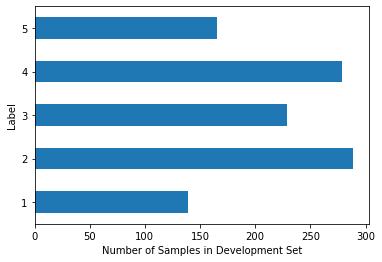

In [8]:
ax = df_dev['truth'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in Development Set")
ax.set_ylabel("Label")